In [1]:
import numpy as np
import pandas as pd

# Plotting
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

from IPython.core.display import HTML; css_file = 'style.css'; HTML(open(css_file, "r").read())

# MS²PIP 2019 manuscript - Figures
This notebook contains the generation of the figures for the MS²PIP 2019 manuscript:
> Updated MS²PIP web server delivers fast and accurate MS² peak intensity prediction for multiple fragmentation methods, instruments and labeling techniques

The notebook requires the following files:
- `ms2pip_manuscript_2019_figures_data.h5` which can be downloaded from [cmbcloud.ugent.be/index.php/s/JtQrKcJ8AE9CA66](https://cmbcloud.ugent.be/index.php/s/JtQrKcJ8AE9CA66).
- `style.css`

The file `ms2pip_manuscript_2019_figures_data.h5` contains all data that is used in the plots for the article.
- `correlations_all` contains the  correlations of all models applied to all evaluation datasets.
- `correlations_matched` contains the correlations of the models applied to their respective evaluation dataset, including peptide lenghts and charges
- `spectrum` contains an empircal TMT spectrum and the predictions by the TMT and HCD models.
- `correlations_models_direct` contains direct correlations between all model predictions for the HCD evaluation dataset.
- `correlations_synthetic_ce` contains HCD model correlations to the ProteomeTools synthetic peptide spectra at different collision energies (CEs)

The notebook was run in Python 3.7 with the following packages:
```
ipython==7.2.0
numpy==1.15.4
pandas==0.23.4
matplotlib==3.0.2
seaborn==0.9.0
```

In [2]:
correlations_all = pd.read_hdf('ms2pip_manuscript_2019_figures_data.h5', key='correlations_all')
correlations_matched = pd.read_hdf('ms2pip_manuscript_2019_figures_data.h5', key='correlations_matched')

## Manuscript figures
### Figure 1A. Boxplot with correlations per model/evaluation dataset
>Figure 1. A) Boxplots showing the Pearson correlation coefficients for each of the specific models applied to their respective evaluation dataset.

Rename some of the model names for the plot

In [3]:
plot_data = correlations_matched.copy()
plot_data.rename(columns={'applied_model': 'Specific model', 'pearsonr': 'Pearson correlation'}, inplace=True)
plot_data['Specific model'] = [x if x != 'iTRAQphospho' else 'iTRAQ\nphospho' for x in plot_data['Specific model']]
plot_data['Specific model'] = [x if x != 'TTOF5600' else 'TripleTOF\n5600+' for x in plot_data['Specific model']]

Plot the boxplots!

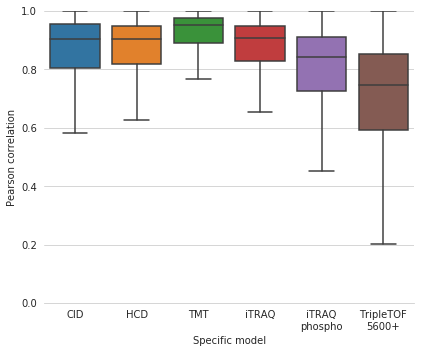

In [4]:
sns.catplot(
    data=plot_data, x='Specific model', y='Pearson correlation',
    order=['CID', 'HCD', 'TMT', 'iTRAQ', 'iTRAQ\nphospho', 'TripleTOF\n5600+'],
    kind='box', aspect=1.2, showfliers=False,
)
sns.despine(left=True)
plt.ylim(0,1)
plt.savefig('from_code/ms2pip_2019_figures_1A.svg',
            dpi=1200, facecolor='white', edgecolor='white',
            transparent=False, pad_inches=0.5
           )
plt.show()

### Figure 1B. Pointplot with correlations for all models applied to all evaluation datasets
> Figure 1. B) Median Pearson correlations when applying all specific models to each evaluation datasets, showing the utility of specialized models. Each dot shows the median Pearson correlation of a specific model applied to a specific evaluation dataset. To improve readability, dots of the same applied model are connected.

Calculate median correlations by all `applied_model`, `data_set` combinations

In [5]:
plot_data = correlations_all.groupby(['applied_model', 'data_set']).median().reset_index()

Rename some of the names for the plot

In [6]:
plot_data = plot_data.rename(columns={
    'applied_model': 'Applied model',
    'data_set': 'Dataset',
    'pearsonr': 'Median Pearson Correlation',
})
plot_data['Dataset'] = [x if x != 'iTRAQphospho' else 'iTRAQ\nphospho' for x in plot_data['Dataset']]
plot_data['Applied model'] = [x if x != 'iTRAQphospho' else 'iTRAQ phospho' for x in plot_data['Applied model']]

plot_data['Dataset'] = [x if x != 'TTOF5600' else 'TripleTOF\n5600+' for x in plot_data['Dataset']]
plot_data['Applied model'] = [x if x != 'TTOF5600' else 'TripleTOF 5600+' for x in plot_data['Applied model']]

Plot the pointplots!

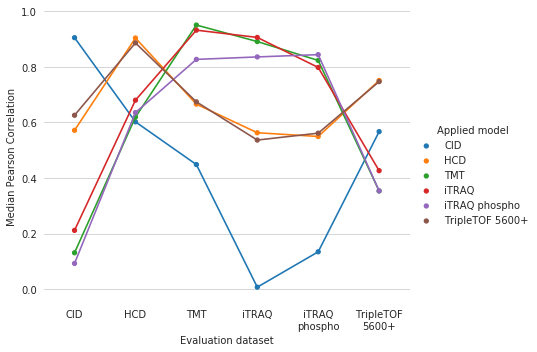

In [7]:
sns.catplot(
    data=plot_data,
    y='Median Pearson Correlation', hue='Applied model', x='Dataset',
    order=['CID', 'HCD', 'TMT', 'iTRAQ', 'iTRAQ\nphospho', 'TripleTOF\n5600+'],
    hue_order=['CID', 'HCD', 'TMT', 'iTRAQ', 'iTRAQ phospho', 'TripleTOF 5600+'],
    kind='point', join=True, scale=0.6, aspect=1.2
)
sns.despine(left=True, bottom=True)
plt.savefig('from_code/ms2pip_2019_figures_1B.svg',
            dpi=1200, facecolor='white', edgecolor='white',
            transparent=False, pad_inches=0.5
           )
plt.xlabel('Evaluation dataset')
plt.show()

## Figure 2. Example of predictions
> Figure 2. Predictions for the peptide sequence EENGVLVLNDANFDNFVADK, carrying two TMT labels, predicted by the specific TMT model (top left) and HCD model (top right), compared to the empirical spectrum (bottom left and right).

In [8]:
spectrum = pd.read_hdf('ms2pip_manuscript_2019_figures_data.h5', key='spectrum')

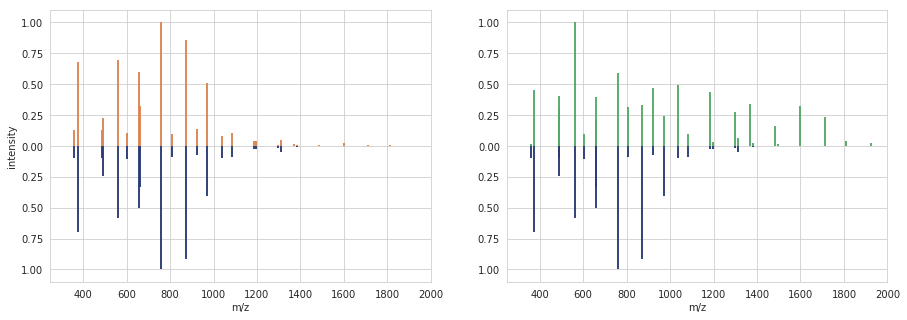

In [9]:
colors = ['#dd8452', '#55a868', '#2b3b75']

fig, axes = plt.subplots(ncols=2, figsize=(15, 5))

# Plot
axes[0].vlines(x=spectrum['mz'], ymin=-0.0001, ymax=-spectrum['Empirical'], color=colors[2])
axes[0].vlines(x=spectrum['mz'], ymin=-0.0001, ymax=-spectrum['Empirical'], color=colors[2])
axes[0].vlines(x=spectrum['mz'], ymin=0.0001, ymax=spectrum['TMT model'], color=colors[0])
axes[0].vlines(x=spectrum['mz'], ymin=0.0001, ymax=spectrum['TMT model'], color=colors[0])

axes[1].vlines(x=spectrum['mz'], ymin=-0.0001, ymax=-spectrum['Empirical'], color=colors[2])
axes[1].vlines(x=spectrum['mz'], ymin=-0.0001, ymax=-spectrum['Empirical'], color=colors[2])
axes[1].vlines(x=spectrum['mz'], ymin=0.0001, ymax=spectrum['HCD model'], color=colors[1])
axes[1].vlines(x=spectrum['mz'], ymin=0.0001, ymax=spectrum['HCD model'], color=colors[1])

# Modify axis
axes[0].set_xlabel('m/z')
axes[1].set_xlabel('m/z')
axes[0].set_ylabel('intensity')
axes[0].set_xlim(250, 2000)
axes[1].set_xlim(250, 2000)

# Make y-axis labels absolute values
ticks =  axes[0].get_yticks()
ticks =  axes[1].get_yticks()
axes[0].set_yticklabels(['{:.2f}'.format(abs(tick)) for tick in ticks])
axes[1].set_yticklabels(['{:.2f}'.format(abs(tick)) for tick in ticks])

plt.savefig('from_code/ms2pip_2019_figures_2.svg',
            dpi=1200, facecolor='white', edgecolor='white',
            transparent=False, pad_inches=0.5
           )
plt.show()

## Supplementary figures
### Supplementary Figure 1: Charge and length
> Supplementary Figure 1. Boxplots showing the Pearson correlation coefficients for the HCD model applied to the HCD evaluation dataset split by precursor charge (A) and peptide length (B). Only boxplots containing more than 750 datapoints are plotted. The number in each boxplot displays its number of datapoints.

#### Precursor charge

In [10]:
plot_data = correlations_matched[correlations_matched['applied_model'] == 'HCD']

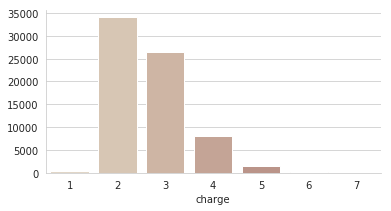

In [11]:
counts = plot_data.groupby('charge')['psmid'].count()
plt.figure(figsize=(6,3))
sns.barplot(counts.index, counts.values, palette=sns.cubehelix_palette(len(counts), start=.5, rot=0.3, dark=0.5))
sns.despine()
plt.show()

Let's remove charges with less then 750 datapoints from the box plots:

In [12]:
counts = plot_data.groupby('charge')['psmid'].count()
allowed_boxplots = list(counts[counts > 750].index)
plot_data = plot_data[plot_data['charge'].isin(allowed_boxplots)]

And plot:

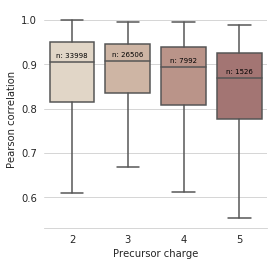

In [13]:
plt.figure(figsize=(4, 4))
df = plot_data
ax = sns.boxplot(
    data=plot_data, x='charge', y='pearsonr', showfliers=False,
    palette=sns.cubehelix_palette(len(plot_data['charge'].unique()), start=.5, rot=0.3, dark=0.5)
)

# Calculate number of obs per group & median to position labels
medians = df.groupby(['charge'])['pearsonr'].median().values
nobs = df['charge'].value_counts().values
nobs = [str(x) for x in nobs.tolist()]
nobs = ["n: " + i for i in nobs]
 
# Add it to the plot
pos = range(len(nobs))
for tick,label in zip(pos,ax.get_xticklabels()):
    ax.text(pos[tick], medians[tick] + 0.01, nobs[tick],
    horizontalalignment='center', size='x-small', color='black')


plt.ylabel('Pearson correlation')
plt.xlabel('Precursor charge')
sns.despine(left=True)
plt.savefig('from_code/ms2pip_2019_suppl_figures_1_charge.svg',
            dpi=1200, facecolor='white', edgecolor='white',
            transparent=False, pad_inches=1
           )
plt.show()

#### Peptide length

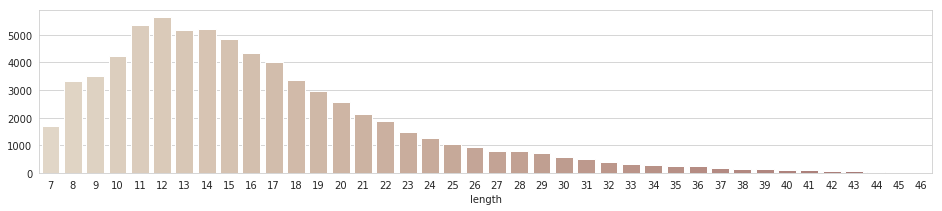

In [14]:
plot_data = correlations_matched[(correlations_matched['applied_model'] == 'HCD')]

counts = plot_data.groupby('length')['psmid'].count()
plt.figure(figsize=(16,3))
sns.barplot(counts.index, counts.values, palette=sns.cubehelix_palette(len(counts), start=.5, rot=0.3, dark=0.5))
plt.show()

And do the same thing here:

In [15]:
counts = plot_data.groupby('length')['psmid'].count()
allowed_boxplots = list(counts[counts > 750].index)
plot_data = plot_data[plot_data['length'].isin(allowed_boxplots)]

Plot!

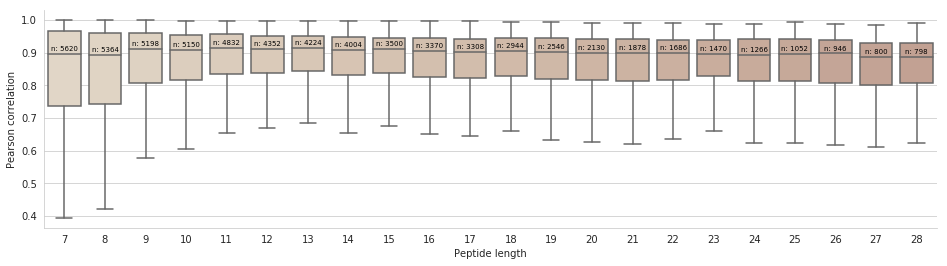

In [16]:
plt.figure(figsize=(16, 4))
df = plot_data
ax = sns.boxplot(
    data=df, x='length', y='pearsonr', showfliers=False,
    palette=sns.cubehelix_palette(len(counts), start=.5, rot=0.3, dark=0.5),
)
 
# Calculate number of obs per group & median to position labels
medians = df.groupby(['length'])['pearsonr'].median().values
nobs = df['length'].value_counts().values
nobs = [str(x) for x in nobs.tolist()]
nobs = ["n: " + i for i in nobs]
 
# Add it to the plot
pos = range(len(nobs))
for tick,label in zip(pos,ax.get_xticklabels()):
    ax.text(pos[tick], medians[tick] + 0.01, nobs[tick],
    horizontalalignment='center', size='x-small', color='black')

sns.despine()
plt.ylabel('Pearson correlation')
plt.xlabel('Peptide length')
plt.savefig('from_code/ms2pip_2019_suppl_figures_1_length.svg',
            dpi=1200, facecolor='white', edgecolor='white',
            transparent=False,
           )
plt.show()

### Supplementary Figure 2: Direct comparison between model predictions
> Supplementary Figure 2. Correlation matrix directly comparing the different model predictions. Pearson correlations were calculated between the predictions of all specific models on a large list of peptides. The numbers in each box correspond to the median Pearson correlation between the model on the x-axis and the model on the y-axis. A darker color indicates a higher median Pearson correlation.

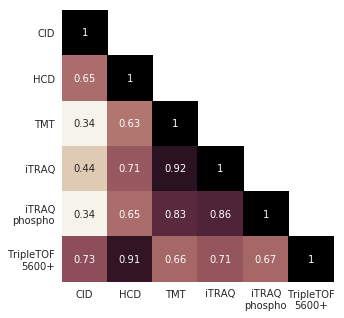

In [17]:
# Read data and calculate mean correlations
correlations_direct = pd.read_hdf('ms2pip_manuscript_2019_figures_data.h5', key='correlations_models_direct')
plot_data = correlations_direct.groupby(['model_1', 'model_2']).median().reset_index()

# Add 1 for correlations between identical models (diagonal)
model_order = ['CID', 'HCD', 'TMT', 'iTRAQ', 'iTRAQphospho', 'TTOF5600']
plot_data = pd.DataFrame([[m, m, 1] for m in model_order], columns=plot_data.columns).append(plot_data)

# Rename datasets for labels
plot_data = plot_data.rename(columns={'model_1': 'Model A', 'model_2': 'Model B', 'pearsonr': 'Median Pearson Correlation'})
plot_data['Model A'] = [x if x != 'iTRAQphospho' else 'iTRAQ\nphospho' for x in plot_data['Model A']]
plot_data['Model B'] = [x if x != 'iTRAQphospho' else 'iTRAQ\nphospho' for x in plot_data['Model B']]
plot_data['Model A'] = [x if x != 'TTOF5600' else 'TripleTOF\n5600+' for x in plot_data['Model A']]
plot_data['Model B'] = [x if x != 'TTOF5600' else 'TripleTOF\n5600+' for x in plot_data['Model B']]

# Transform dataframe to correlations matrix
t = plot_data.pivot(index='Model A', columns='Model B')
t.columns = t.columns.droplevel(0)
del t.columns.name; del t.index.name

# Change column/index order
t = t.loc[['CID', 'HCD', 'TMT', 'iTRAQ', 'iTRAQ\nphospho', 'TripleTOF\n5600+'], ['CID', 'HCD', 'TMT', 'iTRAQ', 'iTRAQ\nphospho', 'TripleTOF\n5600+']]

# Make mask to remove upper triangle
mask = np.full((6, 6), True)
for i in range(6):
    for j in range(6):
        if i >= j:
            mask[i][j] = False

# Plot
plt.figure(figsize=(5, 5))
cmap = sns.cubehelix_palette(100, start=.5, rot=0.3, dark=0, light=.95, reverse=False)
sns.heatmap(data=t, square=True, annot=True, cmap=cmap, mask=mask, cbar=False)
plt.xlabel('')
plt.ylabel('')
plt.xticks(rotation=0) 
plt.yticks(rotation=0)

plt.savefig(
    'from_code/ms2pip_2019_suppl_figures_2_direct_correlations.svg',
    dpi=1200, facecolor='white', edgecolor='white',
    transparent=False, bbox_inches='tight'
)
plt.show()

### Supplementary Figure 3: HCD model evaluation on synthetic peptide spectra accross different CEs
>Supplementary Figure 3. HCD model evaluation on ProteomeTools synthetic peptide spectra (Zolg et al., 2017, 10.1038/nmeth.4153) across different collision energies (CE). Raw files and MaxQuant identifications were downloaded from PRIDE Archive (PXD004732) for all "3xHCD" MS runs. As no target-decoy strategy was included in the submitted MaxQuant results, we predicted MS²PIP spectra and calculated Pearson correlations for all MaxQuant identifications and took the Andromeda scores into account in these plots.
>
>A)	Two-dimensional histogram, or “Hexbin plot”, (center) and histograms (top and right) of the Andromeda score and Pearson correlations between MS²PIP predicted and experimental spectra for all included CEs.
>
>B)	Boxplots of the Pearson correlations between MS²PIP predicted and experimental spectra across ten Andromeda score percentiles and split by CE. Every percentile bin contains 10% of the data.
>
>C)	Boxplots of the Pearson correlations between MS²PIP predicted and experimental spectra for all PSMs with an Andromeda score higher than 200, split by CE.

In [18]:
correlations_synth_ce = pd.read_hdf('ms2pip_manuscript_2019_figures_data.h5', key='correlations_synthetic_ce')
correlations_synth_ce = correlations_synth_ce.rename(columns={
    'pearsonr': 'Pearson correlation',
    'collisionEnergy': 'Collision energy',
    'score': 'Andromeda score'
})

#### 3A: Hexbin of Andromeda score vs MS²PIP correlation

/usr/local/lib/python3.5/dist-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


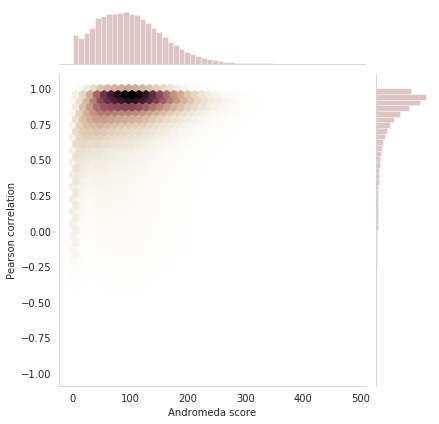

In [19]:
fig_aesthetics = {
    'axes.grid': False,
    'axes.edgecolor': '.8',
    'xtick.color': '.15',
    'ytick.color': '.15',
    'text.color': '.15'
}

cmap = sns.cubehelix_palette(20, start=.5, rot=0.3, dark=0, light=1, as_cmap=True)
color = sns.cubehelix_palette(1, start=.5, rot=0.3, light=0.5)[0]

with sns.axes_style("whitegrid", fig_aesthetics):
    g = sns.jointplot(
        x="Andromeda score", y="Pearson correlation", data=correlations_synth_ce, kind='hex',
        joint_kws={'gridsize':40, 'cmap': cmap},
        marginal_kws={'color': color},
    )
    plt.savefig(
        'from_code/ms2pip_2019_suppl_figures_3A_hexbin.svg',
        dpi=1200, facecolor='white', edgecolor='white',
        transparent=False, bbox_inches='tight'
    )
    plt.show()

#### 3B: Pearson correlations on ProteomeTools synthetic peptide spectra: all Andromeda scores

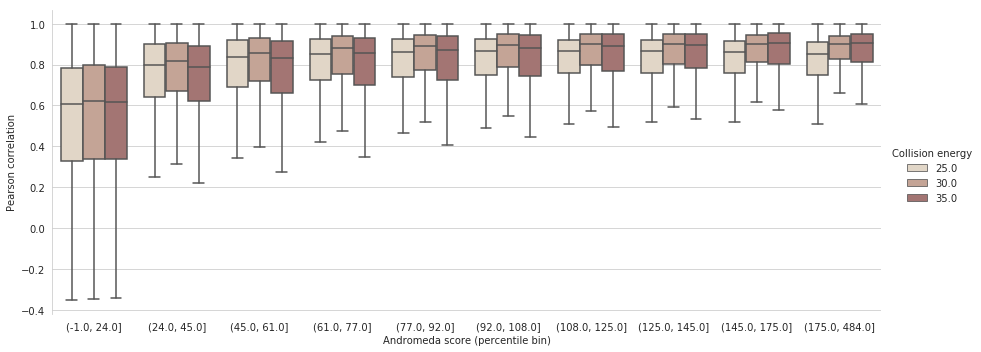

In [20]:
correlations_synth_ce['Andromeda score (percentile bin)'] = pd.qcut(correlations_synth_ce['Andromeda score'], 10, precision=0)

palette = sns.cubehelix_palette(3, start=.5, rot=0.3, dark=0.5)
sns.catplot(
    data=correlations_synth_ce, x='Andromeda score (percentile bin)', y='Pearson correlation', hue='Collision energy',
    kind='box', orient='v', showfliers=False, aspect=2.5, palette=palette
)
plt.savefig(
    'from_code/ms2pip_2019_suppl_figures_3B_all.svg',
    dpi=1200, facecolor='white', edgecolor='white',
    transparent=False,
)
sns.despine(bottom=True)
plt.show()

#### 3C: Pearson correlations on ProteomeTools synthetic peptide spectra: Andromeda scores higher than 200

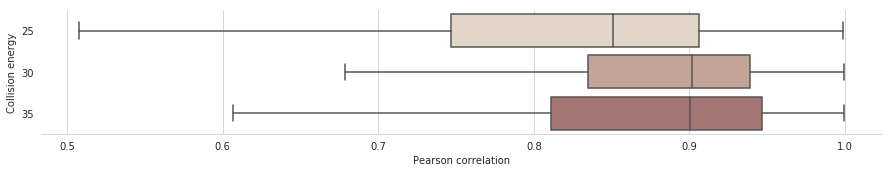

In [21]:
correlations_synth_ce = correlations_synth_ce.astype({'Collision energy': int})

sns.catplot(
    data=correlations_synth_ce[correlations_synth_ce['Andromeda score'] > 200], y='Collision energy', x='Pearson correlation',
    kind='box', orient='h', showfliers=False, aspect=5, height=2.5,
    palette=palette
)
sns.despine(left=True)
plt.savefig(
    'from_code/ms2pip_2019_suppl_figures_3C_score_200.svg',
    dpi=1200, facecolor='white', edgecolor='white',
    transparent=False,
)
plt.show()

Median Pearson correlations:

In [22]:
correlations_synth_ce[correlations_synth_ce['Andromeda score'] > 200]\
    .groupby('Collision energy')['Pearson correlation']\
    .median()\
    .reset_index()

,Collision energy,Pearson correlation
0,25,0.850739
1,30,0.901706
2,35,0.900202
